# 1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining



In [ ]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 2.6 MB/s 
     |████████████████████████████████| 140 kB 20.5 MB/s 
     |████████████████████████████████| 384 kB 50.4 MB/s 
     |████████████████████████████████| 58 kB 1.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


#Collecting and Description

In [ ]:
macbook_air=[]

In [ ]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac   

In [ ]:
macbook_air

["\ni was using macbook air early 2015 before. It was performing ok since i purchased until 2022. But i started facing unexpected shutdown due to poor battery condition. hence i upgraded to M1 Mac in exchange offer. I got around 18k exchange value which was surprising for me.After i started using this i fell in love with this due to following pros1. Excellent battery life (mora than 12 hours continues usage)2. Excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. Excellent display qualityI did not feel any cons during my usage on past 6 months. Only concern is screen is ultra-fingerprint magnet. You need a cleaning cloth always with you which I am carrying with me all the time with IPA liquid for better cleaning performance. But i did not felt about it compared to the performance it was given. Also fingerprint wont be noticeable if the screen is onI thought of buying a screen card for mac (actually I purchased on amazon) to prote

In [ ]:
len(macbook_air)

390

In [ ]:
rev={"review":macbook_air}

In [ ]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [ ]:
review_data

,review
0,\ni was using macbook air early 2015 before. It was performing ok since i purchased until 2022. But i started facing unexpected shutdown due to poor battery condition. hence i upgraded to M1 Mac in exchange offer. I got around 18k exchange value which was surprising for me.After i started using this i fell in love with this due to following pros1. Excellent battery life (mora than 12 hours continues usage)2. Excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. Excellent display qualityI did not feel any cons during my usage on past 6 months. Only concern is screen is ultra-fingerprint magnet. You need a cleaning cloth always with you which I am carrying with me all the time with IPA liquid for better cleaning performance. But i ...
1,"\n1)Screen: great.2)Keyboard & Trackpad: good and great.3)battery life: for web and coding=10+ hrs. for video editing=4-5hrs.4)charging=1.5hrs5)webcam=bad.6)Silent= so cool to operate that it does not heatup and due to this, it does not have any fan inside.7) Maintenance: due to not having a fan, it does not pull any dust from the surrounding= great.8) Build quality= solid.9) Speakers = best front-facing surround sound speakers after M1 MacBook Pro(2021).\n"
2,"\nValue for money laptopIf u r looking for programming this is the oneIt has better power efficiency,better screen quality, smooth & fast UI & small in sizeM1 is still better option... M2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n"
3,\nCamera quality not good\n
4,"\nLoved everything about this one. This one was a love at first sight but took me years to buy. I am really happy with the delivery and genuineness and it was worth it for INR 82,990. Thank you Amazon.\n"
...,...
385,"\nAs good as it gets. Beautiful design, screen. Great keyboard, great speakers. Wonderful build quality. With M1 chips, Apple has once again done what it always does - revolutsonarized the game.\n"
386,"\nI will just say, go for it, if you see this machine on a discount buy it.\n"
387,\nLightning speed of M1. Beautiful rose gold. A breakthrough in technology.Heating- yes it does get heated up. I am updating my review after a month. Rest all good\n
388,\nRemains cold even after extensive usage\n


In [ ]:
text=" ".join(review_data)

#Cleaning the text

In [ ]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [ ]:
review_data

,review
0,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...
1,"\n1)screen: great.2)keyboard & trackpad: good and great.3)battery life: for web and coding=10+ hrs. for video editing=4-5hrs.4)charging=1.5hrs5)webcam=bad.6)silent= so cool to operate that it does not heatup and due to this, it does not have any fan inside.7) maintenance: due to not having a fan, it does not pull any dust from the surrounding= great.8) build quality= solid.9) speakers = best front-facing surround sound speakers after m1 macbook pro(2021).\n"
2,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n"
3,\ncamera quality not good\n
4,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n"
...,...
385,"\nas good as it gets. beautiful design, screen. great keyboard, great speakers. wonderful build quality. with m1 chips, apple has once again done what it always does - revolutsonarized the game.\n"
386,"\ni will just say, go for it, if you see this machine on a discount buy it.\n"
387,\nlightning speed of m1. beautiful rose gold. a breakthrough in technology.heating- yes it does get heated up. i am updating my review after a month. rest all good\n
388,\nremains cold even after extensive usage\n


In [ ]:
text=" ".join(review_data["review"])

In [ ]:
text

'\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i did not felt about it compared to the performance it was given. also fingerprint wont be noticeable if the screen is oni thought of buying a screen card for mac (actually i purchased on amazon) to protec

In [ ]:
import nltk
nltk.download('punkt')
text_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text_tokens

['i',
 'was',
 'using',
 'macbook',
 'air',
 'early',
 '2015',
 'before',
 '.',
 'it',
 'was',
 'performing',
 'ok',
 'since',
 'i',
 'purchased',
 'until',
 '2022.',
 'but',
 'i',
 'started',
 'facing',
 'unexpected',
 'shutdown',
 'due',
 'to',
 'poor',
 'battery',
 'condition',
 '.',
 'hence',
 'i',
 'upgraded',
 'to',
 'm1',
 'mac',
 'in',
 'exchange',
 'offer',
 '.',
 'i',
 'got',
 'around',
 '18k',
 'exchange',
 'value',
 'which',
 'was',
 'surprising',
 'for',
 'me.after',
 'i',
 'started',
 'using',
 'this',
 'i',
 'fell',
 'in',
 'love',
 'with',
 'this',
 'due',
 'to',
 'following',
 'pros1',
 '.',
 'excellent',
 'battery',
 'life',
 '(',
 'mora',
 'than',
 '12',
 'hours',
 'continues',
 'usage',
 ')',
 '2.',
 'excellent',
 'performance',
 'compared',
 'to',
 'my',
 'previous',
 'macbook',
 '2015',
 'model',
 '(',
 'more',
 'than',
 '200',
 '%',
 'bump',
 'in',
 'performance',
 'i',
 'felt',
 ')',
 '3.',
 'excellent',
 'display',
 'qualityi',
 'did',
 'not',
 'feel',
 'any',


In [ ]:
nltk.download('stopwords')
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#create the DF

In [ ]:
tf=TfidfVectorizer()

In [ ]:
text_tf=tf.fit_transform(text_without_sw)

In [ ]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df

,000,10,100,1000,10finally,10get,10hours,10i,10k,10light,...,xps,year,years,yesterday,yet,you,youtube,yrs,yu,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
words_list=" ".join(df)

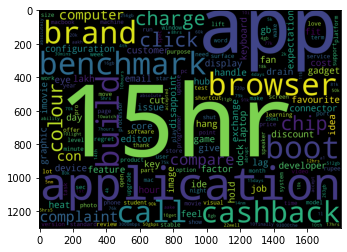

In [ ]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

#Sentimental Analysis

In [ ]:
with open ("/content/positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]


In [ ]:
with open ("/content/negative-words.txt","r",encoding = "latin") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]    

In [ ]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [ ]:
pos_text=" ".join([word for word in df if not word  in positive_words])

#Conclusion

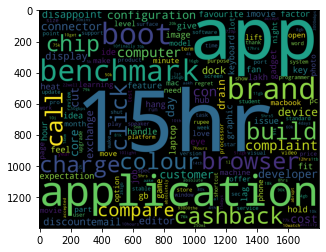

In [ ]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

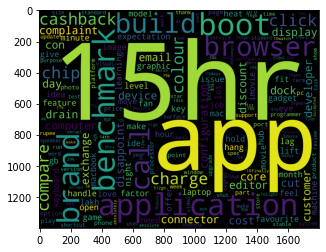

In [ ]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [ ]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...,0.454167,0.201716
1,"\n1)screen: great.2)keyboard & trackpad: good and great.3)battery life: for web and coding=10+ hrs. for video editing=4-5hrs.4)charging=1.5hrs5)webcam=bad.6)silent= so cool to operate that it does not heatup and due to this, it does not have any fan inside.7) maintenance: due to not having a fan, it does not pull any dust from the surrounding= great.8) build quality= solid.9) speakers = best front-facing surround sound speakers after m1 macbook pro(2021).\n",0.450000,0.366667
2,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n",0.518333,0.223333
3,\ncamera quality not good\n,0.600000,-0.350000
4,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n",0.566667,0.510000
...,...,...,...
385,"\nas good as it gets. beautiful design, screen. great keyboard, great speakers. wonderful build quality. with m1 chips, apple has once again done what it always does - revolutsonarized the game.\n",0.750000,0.625000
386,"\ni will just say, go for it, if you see this machine on a discount buy it.\n",0.000000,0.000000
387,\nlightning speed of m1. beautiful rose gold. a breakthrough in technology.heating- yes it does get heated up. i am updating my review after a month. rest all good\n,0.850000,0.716667
388,\nremains cold even after extensive usage\n,0.666667,-0.300000


In [ ]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,\ni was using macbook air early 2015 before. it was performing ok since i purchased until 2022. but i started facing unexpected shutdown due to poor battery condition. hence i upgraded to m1 mac in exchange offer. i got around 18k exchange value which was surprising for me.after i started using this i fell in love with this due to following pros1. excellent battery life (mora than 12 hours continues usage)2. excellent performance compared to my previous macbook 2015 model (more than 200% bump in performance i felt)3. excellent display qualityi did not feel any cons during my usage on past 6 months. only concern is screen is ultra-fingerprint magnet. you need a cleaning cloth always with you which i am carrying with me all the time with ipa liquid for better cleaning performance. but i ...,0.454167,0.201716,Positive
1,"\n1)screen: great.2)keyboard & trackpad: good and great.3)battery life: for web and coding=10+ hrs. for video editing=4-5hrs.4)charging=1.5hrs5)webcam=bad.6)silent= so cool to operate that it does not heatup and due to this, it does not have any fan inside.7) maintenance: due to not having a fan, it does not pull any dust from the surrounding= great.8) build quality= solid.9) speakers = best front-facing surround sound speakers after m1 macbook pro(2021).\n",0.450000,0.366667,Positive
2,"\nvalue for money laptopif u r looking for programming this is the oneit has better power efficiency,better screen quality, smooth & fast ui & small in sizem1 is still better option... m2 is good but i think there is no huge improvement between m2 & m1 soo if u hava 80k go for m1 mac instead of m2 if u have high budget go for pro model's dont go for basic ones\n",0.518333,0.223333,Positive
3,\ncamera quality not good\n,0.600000,-0.350000,Negative
4,"\nloved everything about this one. this one was a love at first sight but took me years to buy. i am really happy with the delivery and genuineness and it was worth it for inr 82,990. thank you amazon.\n",0.566667,0.510000,Positive
...,...,...,...,...
385,"\nas good as it gets. beautiful design, screen. great keyboard, great speakers. wonderful build quality. with m1 chips, apple has once again done what it always does - revolutsonarized the game.\n",0.750000,0.625000,Positive
386,"\ni will just say, go for it, if you see this machine on a discount buy it.\n",0.000000,0.000000,Neutral
387,\nlightning speed of m1. beautiful rose gold. a breakthrough in technology.heating- yes it does get heated up. i am updating my review after a month. rest all good\n,0.850000,0.716667,Positive
388,\nremains cold even after extensive usage\n,0.666667,-0.300000,Negative


In [ ]:
review_data['analysis'].value_counts()

Positive    313
Neutral      51
Negative     26
Name: analysis, dtype: int64

In [ ]:
#positive comments
((228+33)/280)*100

93.21428571428572

In [ ]:
#negative comments
(19/199)*100

9.547738693467336

so in this review data only 9% is about the negative comments so the macbook air product Received good product reviews from users